In [525]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import random

In [526]:
# load breast cancer
data = load_breast_cancer()
indices = np.random.permutation(len(data.target))
data.data, data.target = data.data[indices], data.target[indices]

In [527]:
# define Dataset
class Dataset:
    def __init__(self, data):
      self.x, self.y = data
    def __getitem__(self, item): return self.x[item], self.y[item]
    def __len__(self): return len(self.y)
# Dataset

def dataset_visualize(dataset: Dataset):
  for x, y in dataset: print(f"{'-' * 16}\nx: {x}\ny: {y}")
# dataset_visualize

# init Datasets
trainset = Dataset((data.data[:100, 0:2], data.target[:100]))
testset = Dataset((data.data[100:, 0:2], data.target[100:]))

In [528]:
def sigmoid(x, e=2.7182): return 1 / (1 + e ** (-x))
def relu(x): return np.array(max(0, x))

In [529]:
def gdr(x, y, weight, act_func, lr):
    indications = act_func(np.dot(x, weight))
    weight -= (lr / x.shape[0]) * np.dot(x.T, (indications - y))
# gdr

class LogisticRegression:
    def __init__(self, n_inpt): self.weight = np.random.rand(n_inpt)
    def train(self, dataset, iters: int, lr=0.01):
        for _ in range(iters):
            for x, y in dataset:
                gdr(x, y, self.weight, act_func=relu, lr=lr)
    # train
    
    def __call__(self, x): return 0 if np.dot(x, self.weight) >= 0.5 else 1
    
    def loss(self, xy):
        x, y = xy.data[:100, 0:2], xy.target[:100]
        probability = np.dot(x, self.weight)
        loss = np.mean(np.exp(1 - probability) * y) + np.sum(np.exp(probability) * (1 - y))
        print(f"cost: {loss:.3f}")
    # loss
# LogisticRegression

In [530]:
model = LogisticRegression(len(trainset.x[0]))
model.loss(data)
model.train(trainset, iters=1000, lr=0.01)

cost: 11602471.016


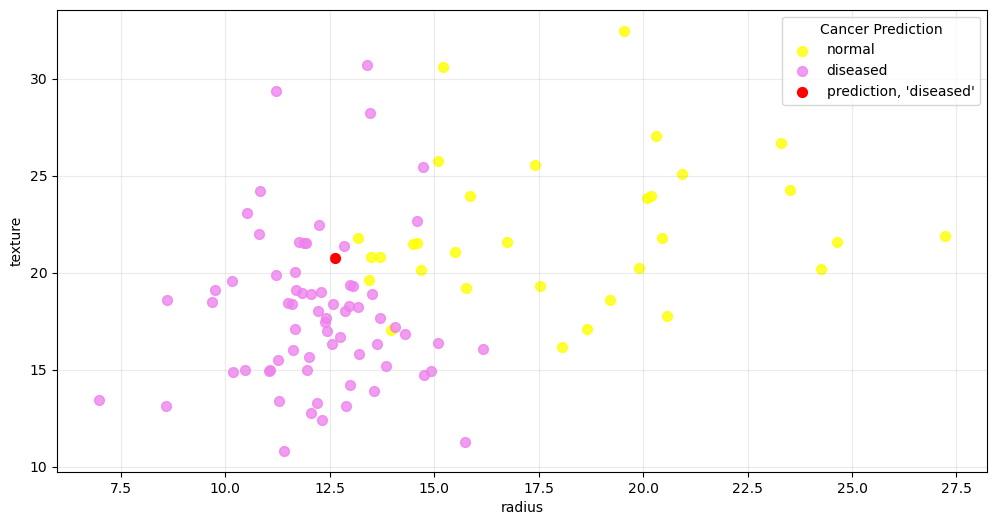

In [531]:
# init a testset
index = random.randrange(0, 100)
test_x, test_y = testset[index]

diseased = np.array([list(trainset.x[_]) for _ in range(trainset.__len__()) if trainset.y[_] == 1])
normal = np.array([list(trainset.x[_]) for _ in range(trainset.__len__()) if trainset.y[_] == 0])
pred = model(test_x)

fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
ax1.set_xlabel('radius')
ax1.set_ylabel('texture')
ax1.grid(True, alpha=0.25)

ax1.scatter(x=normal[:,0], y=normal[:,1], s=50, alpha=0.8, c="yellow", label="normal")
ax1.scatter(x=diseased[:,0], y=diseased[:,1], s=50, alpha=0.8, c="violet", label="diseased")
ax1.scatter(x=test_x[0], y=test_x[1], s=50, alpha=1, c="r", label=f"prediction, '{'diseased' if pred == 1 else 'normal'}'")
ax1.legend(fontsize="10", loc="best", title="Cancer Prediction")

In [532]:
model.loss(data)

cost: 19.894
